# Preparing Data

Get the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv

#import xlrd


#df=pd.read_csv('cardio_train.csv')


f = open("/content/drive/MyDrive/MachineLearning/cardio_train.csv", "r")


rows=[]
def modify(line,rows):
    line=line.split(';')
    rows.append(line)
    
for i in range(70000):
    line=f.readline()
    line=line.replace("\n","")
    #line[-1]=line[-1].replace("\n","")
    modify(line,rows)
    


with open('/content/drive/MyDrive/MachineLearning/dataCardio.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(70000):
        writer.writerow(rows[i])
        #print(int(i/70000))

# Training

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/MachineLearning/dataCardio.csv')

In [ ]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,49971.705224,19468.850512,1.349576,164.359148,74.205722,128.817412,96.630652,1.366862,1.226460,0.088130,0.053772,0.803726,0.499707
std,28850.888785,2467.265969,0.476840,8.210157,14.395857,154.012516,188.473866,0.680251,0.572274,0.283486,0.225569,0.397181,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.500000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.000000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74887.500000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99998.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X=df.drop(columns="cardio")
X=X.drop(columns="id")

In [ ]:
y=df["cardio"]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model=DecisionTreeClassifier()

model.fit(x_train,y_train)
predictions=model.predict(x_test)

score=accuracy_score(y_test,predictions)

score

0.6332857142857143

In [ ]:
score=accuracy_score(y_test,predictions)

score

0.6344285714285715

In [ ]:
x_test

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
27721,20152,1,152,75.0,120,70,1,1,0,0,1
47876,16099,2,175,78.0,110,80,1,1,0,0,0
8027,17571,1,158,55.0,120,80,1,1,0,0,1
27455,16943,2,176,69.0,130,80,1,1,0,0,0
68637,20962,1,158,65.0,140,90,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
24196,19202,2,170,66.0,120,80,1,1,0,0,1
43527,17837,2,165,63.0,120,80,1,1,1,0,1
61564,15910,1,160,75.0,130,89,2,2,0,0,1
42000,18897,2,163,61.0,130,80,1,1,0,0,0


In [ ]:
p=model.predict([[8030,2,186,82,179,79,1,1,1,1,0]])
print(p)

[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


# Finding a Better model :

In [ ]:
# bestModel=[model,score,x_train,x_test,y_train,y_test]

# for i in range(1000):
#   x_train2,x_test2,y_train2,y_test2 = train_test_split(X,y,test_size=0.2)

#   model2=DecisionTreeClassifier()

#   model2.fit(x_train2,y_train2)
#   predictions=model2.predict(x_test2)

#   score2=accuracy_score(y_test2,predictions)

#   if(score2>bestModel[1]):
#     print(score2)
#     bestModel[0]=model2
#     bestModel[1]=score2
#     bestModel[2]=x_train2
#     bestModel[3]=x_test2
#     bestModel[4]=y_train2
#     bestModel[5]=y_test2


0.6313571428571428
0.6372857142857142
0.6379285714285714
0.6386428571428572
0.6440714285714285
0.6455714285714286


# La fonction suivante permet de sauvegarder la liste dans un fichier

In [ ]:
# def listToFile(liste,file):
  

In [ ]:
#joblib.dump(bestModel[0],"/content/drive/MyDrive/MachineLearning/model.csv")

In [ ]:
bestModel[1]

0.6340714285714286

In [ ]:
xmodel=joblib.load("/content/drive/MyDrive/MachineLearning/model.csv")

In [ ]:
predict=xmodel.predict(x_test)
scoreAncien=accuracy_score(y_test,predict)
scoreAncien

0.9247142857142857

In [ ]:
#joblib.dump(bestModel[0],"/content/drive/MyDrive/MachineLearning/model2.csv")

In [ ]:
model2=joblib.load("/content/drive/MyDrive/MachineLearning/model2.csv")

In [ ]:
predict=model2.predict(x_test)
scoreAncien=accuracy_score(y_test,predict)
scoreAncien

0.9296428571428571

In [ ]:
# import matplotlib.pyplot as plt
 
# # # x-axis values
# # x = [1,2,3,4,5,6,7,8,9,10]
# # # y-axis values
# # y = [2,4,5,7,6,8,9,11,12,12]
 
# # plotting points as a scatter plot
# plt.scatter(x, y, label= "stars", color= "green",
#             marker= "*", s=30)
 
# # x-axis label
# plt.xlabel('x - axis')
# # frequency label
# plt.ylabel('y - axis')
# # plot title
# plt.title('My scatter plot!')
# # showing legend
# plt.legend()
 
# # function to show the plot
# plt.show()

In [ ]:
df

In [ ]:
x=df["weight"]

In [ ]:
m=0
notM=0
for stats in y:
  if(stats==0):
    m=m+1
  else:
    notM=notM+1
print(m)
print(notM)

# Partie Analyse

* L'hauteur est en centi-mètre  
* 1 est femme, 2 est homme
* Le poid est en KG



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


In [ ]:
df.shape

(69999, 13)

Donc le nombre total des personnes est 69999.

In [ ]:
nombreFemmeTotale=0
nombreFemmeMalade=0
nombreHommeMalade=0
nombreHommeTotale=0
for i in range(len(df)):
  if(df['gender'][i]==2):
    nombreFemmeTotale=nombreFemmeTotale+1
    if(df['cardio'][i]==1):
      nombreFemmeMalade=nombreFemmeMalade+1
  else:
    nombreHommeTotale=nombreHommeTotale+1
    if(df['cardio'][i]==1):
      nombreHommeMalade=nombreHommeMalade+1

In [ ]:
print(nombreFemmeTotale)

24470


L'échantillonage est composé par :

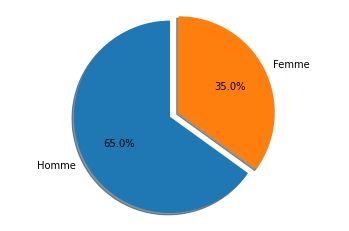

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Homme', 'Femme'
sizes = [nombreHommeTotale,nombreFemmeTotale]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Selon le genre :

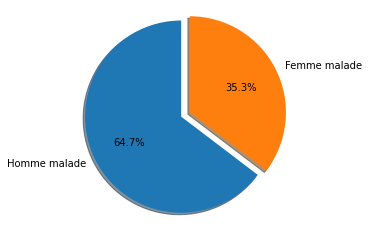

In [ ]:
labels = 'Homme malade', 'Femme malade'
sizes = [nombreHommeMalade,nombreFemmeMalade]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

La distribution :

In [ ]:
FemmeMaladeFUM=0
HommeMaladeFUM=0
FemmeMaladeAlch=0
HommeMaladeAlch=0
FemmeMaladeActive=0
HommeMaladeActive=0

for i in range(len(df)):
  if(df['gender'][i]==2):
    if(df['cardio'][i]==1):
      if(df['cholesterol'][i]==1):
        FemmeMaladeCH=FemmeMaladeCH+1
      if(df['smoke'][i]==1):
        FemmeMaladeFUM=FemmeMaladeFUM+1
      if(df['active'][i]==0):
        FemmeMaladeActive=FemmeMaladeActive+1
        if(df['alco'][i]==1):
          FemmeMaladeAlch=FemmeMaladeAlch+1
      
  else:
    if(df['cardio'][i]==1):
      if(df['cholesterol'][i]==1):
        HommeMaladeCH=HommeMaladeCH+1
      if(df['smoke'][i]==1):
        HommeMaladeFUM=HommeMaladeFUM+1
      if(df['active'][i]==0):
        HommeMaladeActive=HommeMaladeActive+1
      if(df['alco'][i]==1):
        HommeMaladeAlch=HommeMaladeAlch+1

In [ ]:
HommeMaladeActive

17867

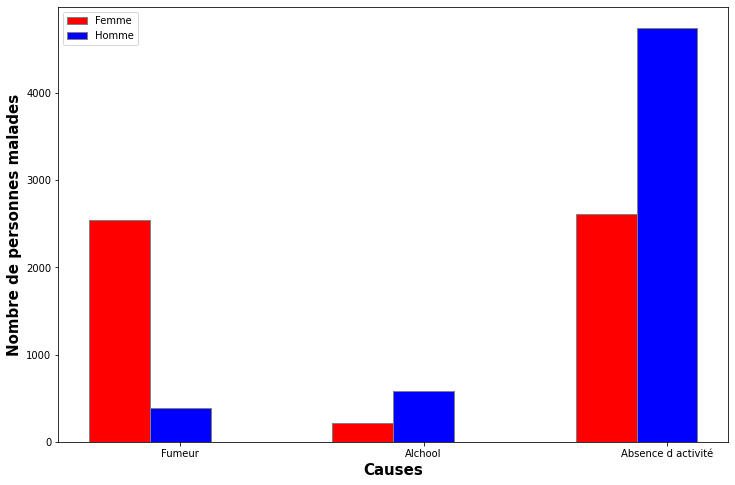

In [ ]:
# set width of bar
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
IT = [FemmeMaladeFUM, FemmeMaladeAlch, FemmeMaladeActive]
ECE = [28, 6, 16]
CSE = [HommeMaladeFUM, HommeMaladeAlch, HommeMaladeActive]
 
# Set position of bar on X axis
br1 = np.arange(len(IT))
# br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth,
        edgecolor ='grey', label ='Femme')
# plt.bar(br2, ECE, color ='g', width = barWidth,
#         edgecolor ='grey', label ='ECE')
plt.bar(br3, CSE, color ='b', width = barWidth,
        edgecolor ='grey', label ='Homme')
 
# Adding Xticks
plt.xlabel('Causes', fontweight ='bold', fontsize = 15)
plt.ylabel('Nombre de personnes malades', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
        ['Fumeur', 'Alchool', 'Absence d activité'])
 
plt.legend()
plt.show()

Pour le glucose :

In [ ]:
FemmeMaladeGlucoseN=0
HommeMaladeGlucoseN=0
FemmeMaladeGlucoseAN=0
HommeMaladeGlucoseAN=0
FemmeMaladeGlucoseWAN=0
HommeMaladeGlucoseWAN=0
for i in range(len(df)):
  if(df['gender'][i]==2):
    if(df['cardio'][i]==1):
      if(df['gluc'][i]==1):
        FemmeMaladeGlucoseN=FemmeMaladeGlucoseN+1
      elif(df['gluc'][i]==2):
        FemmeMaladeGlucoseAN=FemmeMaladeGlucoseAN+1
      else:
        FemmeMaladeGlucoseWAN=FemmeMaladeGlucoseWAN+1
  else:
    if(df['cardio'][i]==1):
      if(df['gluc'][i]==1):
        HommeMaladeGlucoseN=HommeMaladeGlucoseN+1
      elif(df['gluc'][i]==2):
        HommeMaladeGlucoseAN=HommeMaladeGlucoseAN+1
      else:
        HommeMaladeGlucoseWAN=HommeMaladeGlucoseWAN+1

Pour les femmes :

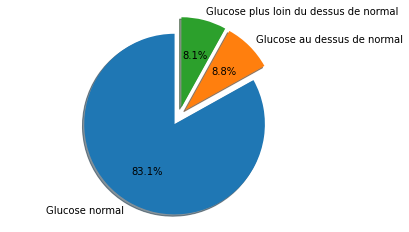

In [ ]:
labels = 'Glucose normal', 'Glucose au dessus de normal', 'Glucose plus loin du dessus de normal'
sizes = [FemmeMaladeGlucoseN,FemmeMaladeGlucoseAN,FemmeMaladeGlucoseWAN]
explode = (0.1, 0.1,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Pour les hommes :

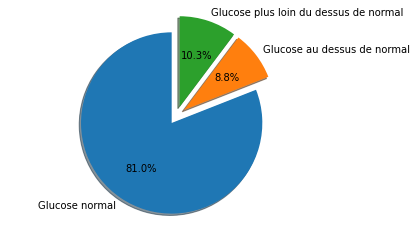

In [ ]:
labels = 'Glucose normal', 'Glucose au dessus de normal', 'Glucose plus loin du dessus de normal'
sizes = [HommeMaladeGlucoseN,HommeMaladeGlucoseAN,HommeMaladeGlucoseWAN]
explode = (0.1, 0.1,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Concernant le cholesterole :

In [ ]:
FemmeMaladeCholesteroleN=0
HommeMaladeCholesteroleN=0
FemmeMaladeCholesteroleAN=0
HommeMaladeCholesteroleAN=0
FemmeMaladeCholesteroleWAN=0
HommeMaladeCholesteroleWAN=0
for i in range(len(df)):
  if(df['gender'][i]==2):
    if(df['cardio'][i]==1):
      if(df['cholesterol'][i]==1):
        FemmeMaladeCholesteroleN=FemmeMaladeCholesteroleN+1
      elif(df['cholesterol'][i]==2):
        FemmeMaladeCholesteroleAN=FemmeMaladeCholesteroleAN+1
      else:
        FemmeMaladeCholesteroleWAN=FemmeMaladeCholesteroleWAN+1
  else:
    if(df['cardio'][i]==1):
      if(df['cholesterol'][i]==1):
        HommeMaladeCholesteroleN=HommeMaladeCholesteroleN+1
      elif(df['cholesterol'][i]==2):
        HommeMaladeCholesteroleAN=HommeMaladeCholesteroleAN+1
      else:
        HommeMaladeCholesteroleWAN=HommeMaladeCholesteroleWAN+1

Pour les femmes :

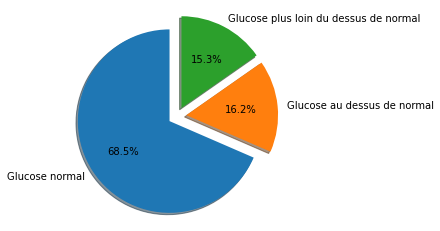

In [ ]:
labels = 'Glucose normal', 'Glucose au dessus de normal', 'Glucose plus loin du dessus de normal'
sizes = [FemmeMaladeCholesteroleN,FemmeMaladeCholesteroleAN,FemmeMaladeCholesteroleWAN]
explode = (0.1, 0.1,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Pour les hommes :

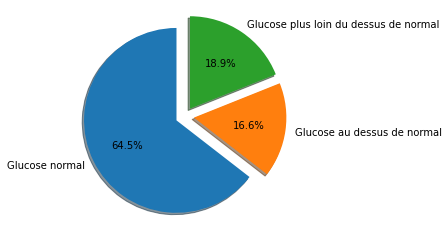

In [ ]:
labels = 'Glucose normal', 'Glucose au dessus de normal', 'Glucose plus loin du dessus de normal'
sizes = [HommeMaladeCholesteroleN,HommeMaladeCholesteroleAN,HommeMaladeCholesteroleWAN]
explode = (0.1, 0.1,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
df.head(4)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1


In [ ]:
def calculeProba(number,liste):
  n=0
  for element in liste:
    if number==element:
      n=n+1
  return n/len(liste)

In [ ]:
ages=[]
for age in df['age']:
  if not age in ages:
    ages.append(age)
len(ages)

8076

In [ ]:
newAges=sorted(ages)

In [ ]:
x=[]

In [ ]:
for age in newAges:
  x.append(calculeProba(age,df['age']))

In [ ]:
y=[]
s=0
for proba in x:
  s=s+proba
  y.append(s)

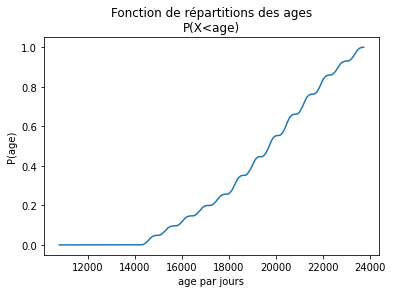

In [ ]:
plt.plot(newAges, y)
plt.xlabel('age par jours') 
plt.ylabel('P(age)') 
  
# displaying the title
plt.title("Fonction de répartitions des ages\nP(X<age)")
plt.show()

Concernant le poid :

In [ ]:
weight=[]
for age in df['weight']:
  if not age in weight:
    weight.append(age)
len(weight)

287

In [ ]:
weight=sorted(weight)

In [ ]:
x=[]
for w in weight:
  x.append(calculeProba(w,df['weight']))

In [ ]:
y=[]
s=0
for proba in x:
  s=s+proba
  y.append(s)

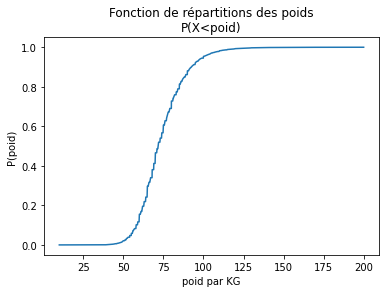

In [ ]:
plt.plot(weight, y)
plt.xlabel('poid par KG') 
plt.ylabel('P(poid)') 
  
# displaying the title
plt.title("Fonction de répartitions des poids\nP(X<poid)")
plt.show()

Concernant la taille :

In [ ]:
df.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


In [ ]:
height=[]
for t in df['height']:
  if not t in height:
    height.append(t)
len(height)

109

In [ ]:
height=sorted(height)

In [ ]:
x=[]
for w in height:
  x.append(calculeProba(w,df['height']))

In [ ]:
y=[]
s=0
for proba in x:
  s=s+proba
  y.append(s)

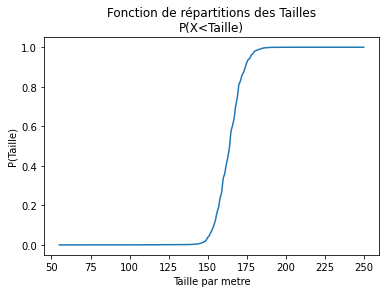

In [ ]:
plt.plot(height, y)
plt.xlabel('Taille par metre') 
plt.ylabel('P(Taille)') 
  
# displaying the title
plt.title("Fonction de répartitions des Tailles\nP(X<Taille)")
plt.show()

Concernant la tension artérielle systolique

In [ ]:
ap_hi=[]
for t in df['ap_hi']:
  if not t in ap_hi:
    ap_hi.append(t)
len(ap_hi)

153

In [ ]:
ap_hi=sorted(ap_hi)

In [ ]:
x=[]
for w in ap_hi:
  x.append(calculeProba(w,df['ap_hi']))

In [ ]:
y=[]
s=0
for proba in x:
  s=s+proba
  y.append(s)

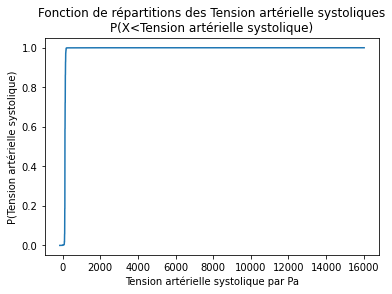

In [ ]:
plt.plot(ap_hi, y)
plt.xlabel('Tension artérielle systolique par Pa') 
plt.ylabel('P(Tension artérielle systolique)') 
  
# displaying the title
plt.title("Fonction de répartitions des Tension artérielle systoliques\nP(X<Tension artérielle systolique)")
plt.show()

Concernant la tension artérielle diastolique :

In [ ]:
ap_lo=[]
for t in df['ap_lo']:
  if not t in ap_lo:
    ap_lo.append(t)
len(ap_lo)

157

In [ ]:
ap_lo=sorted(ap_lo)

In [ ]:
x=[]
for w in ap_lo:
  x.append(calculeProba(w,df['ap_lo']))

In [ ]:
y=[]
s=0
for proba in x:
  s=s+proba
  y.append(s)

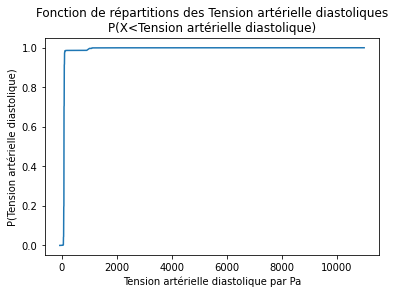

In [ ]:
plt.plot(ap_lo, y)
plt.xlabel('Tension artérielle diastolique par Pa') 
plt.ylabel('P(Tension artérielle diastolique)') 
  
# displaying the title
plt.title("Fonction de répartitions des Tension artérielle diastoliques\nP(X<Tension artérielle diastolique)")
plt.show()

# Visualisation PART 2

la description des données :

In [ ]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,49971.705224,19468.850512,1.349576,164.359148,74.205722,128.817412,96.630652,1.366862,1.226460,0.088130,0.053772,0.803726,0.499707
std,28850.888785,2467.265969,0.476840,8.210157,14.395857,154.012516,188.473866,0.680251,0.572274,0.283486,0.225569,0.397181,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.500000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.000000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74887.500000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99998.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.shape

(69999, 13)

la colone Age :

In [ ]:
df.insert(13, "AgeAnnee", [0 for i in range(len(df))])
for i in range(len(df)):
  df['AgeAnnee'][i]=df['age'][i]//365

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


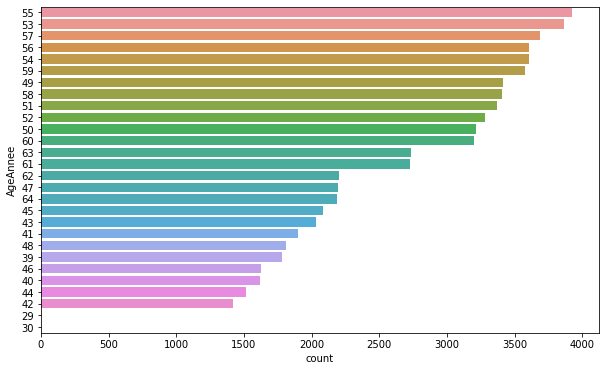

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data = df, y = 'AgeAnnee', order = df.AgeAnnee.value_counts().index)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


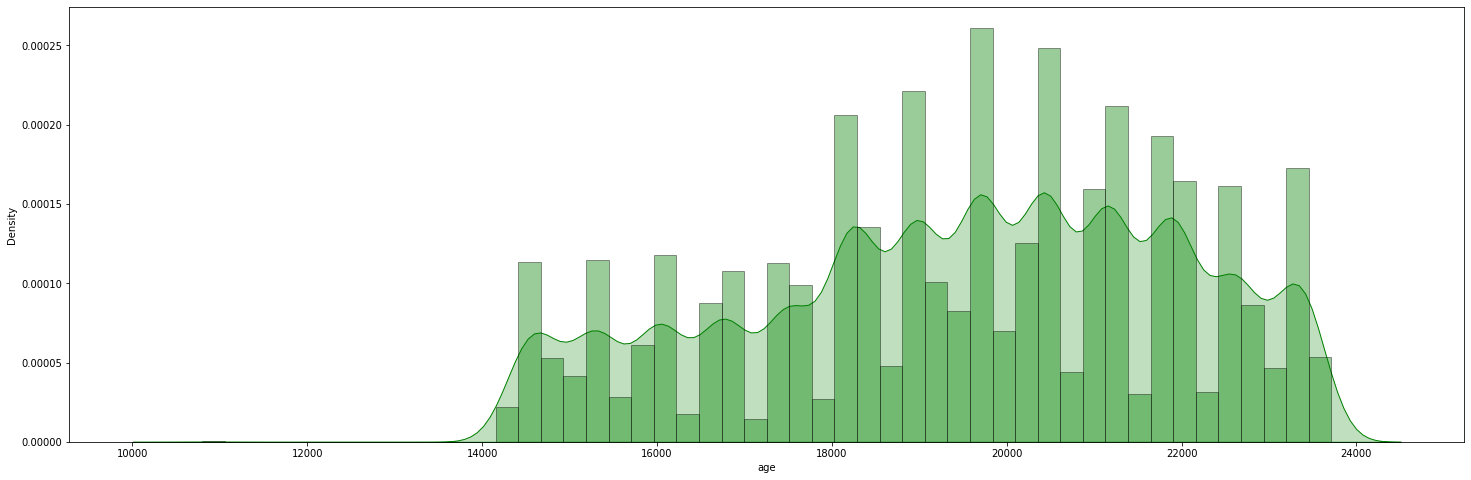

In [ ]:
plt.figure(figsize=(25, 8))
sns.distplot(df['age'], hist=True, kde=True, 
              color = 'green',bins = 50,
             kde_kws={'linewidth': 1,'shade': True },
             hist_kws={'edgecolor':'black'})

Colone Genre :

In [ ]:
df['gender'][0]

2

In [ ]:
homme=0
for genre in df['gender']:
  if genre==1:
    homme=homme+1

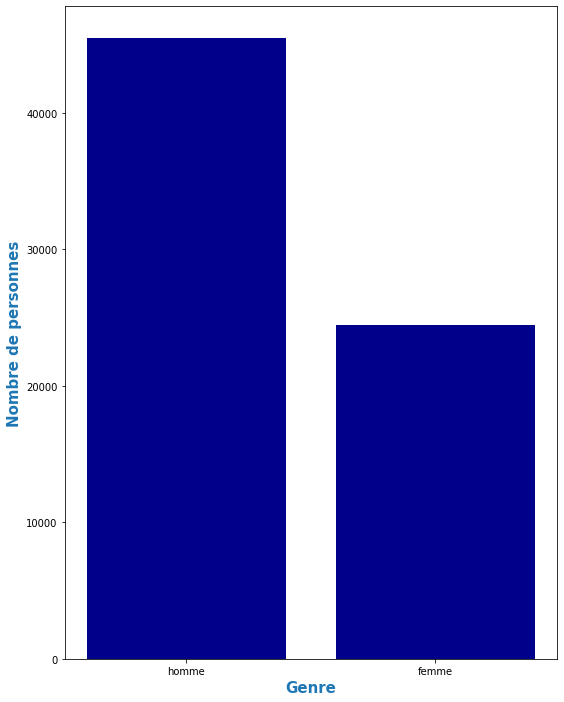

In [ ]:
barWidth = 0.2
fig = plt.subplots(figsize =(30, 12))
plt.subplot(131)
plt.bar(['homme','femme',], [homme, len(df)-homme],color="#00008B")
plt.ylabel('Nombre de personnes', fontweight ='bold', fontsize = 15,color='C0')
plt.xlabel('Genre', fontweight ='bold', fontsize = 15,color='C0')
plt.show()

La colone Height :

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


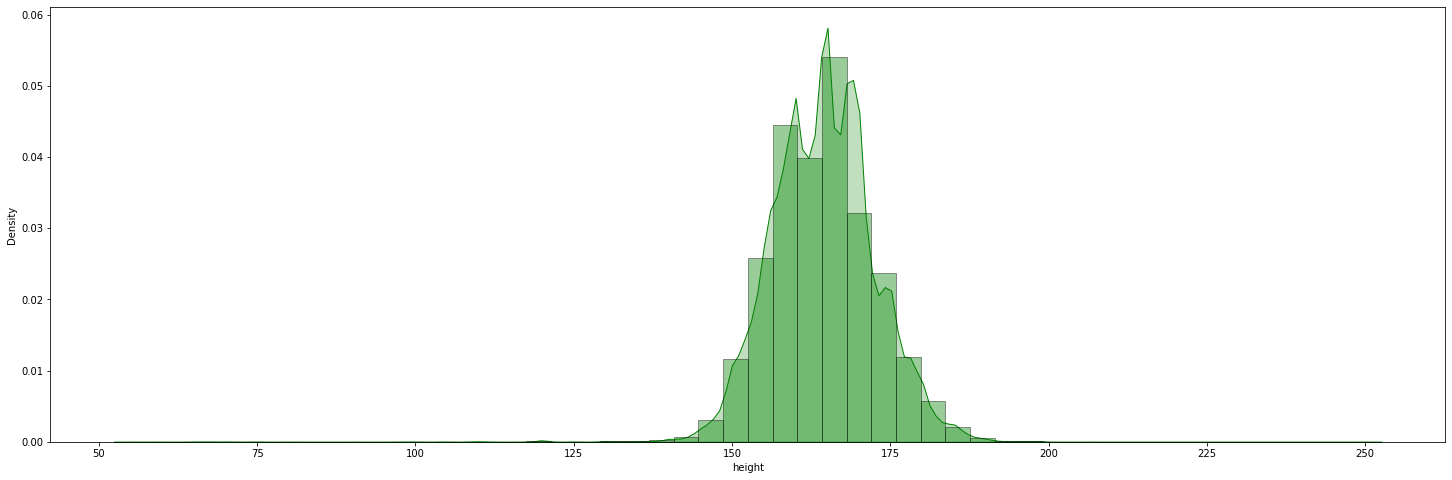

In [ ]:
plt.figure(figsize=(25, 8))
sns.distplot(df['height'], hist=True, kde=True, 
              color = 'green',bins = 50,
             kde_kws={'linewidth': 1,'shade': True },
             hist_kws={'edgecolor':'black'})

La colone du poid :

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


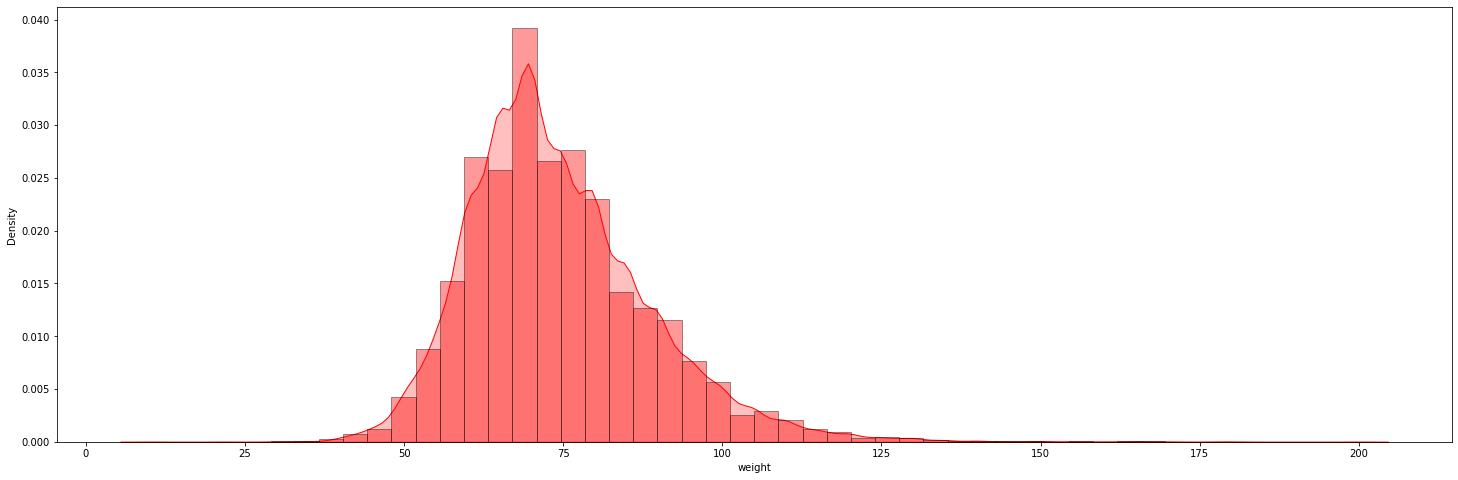

In [ ]:
plt.figure(figsize=(25, 8))
sns.distplot(df['weight'], hist=True, kde=True, 
              color = 'red',bins = 50,
             kde_kws={'linewidth': 1,'shade': True },
             hist_kws={'edgecolor':'black'})

Pour la colone de la Tension artérielle systolique : 

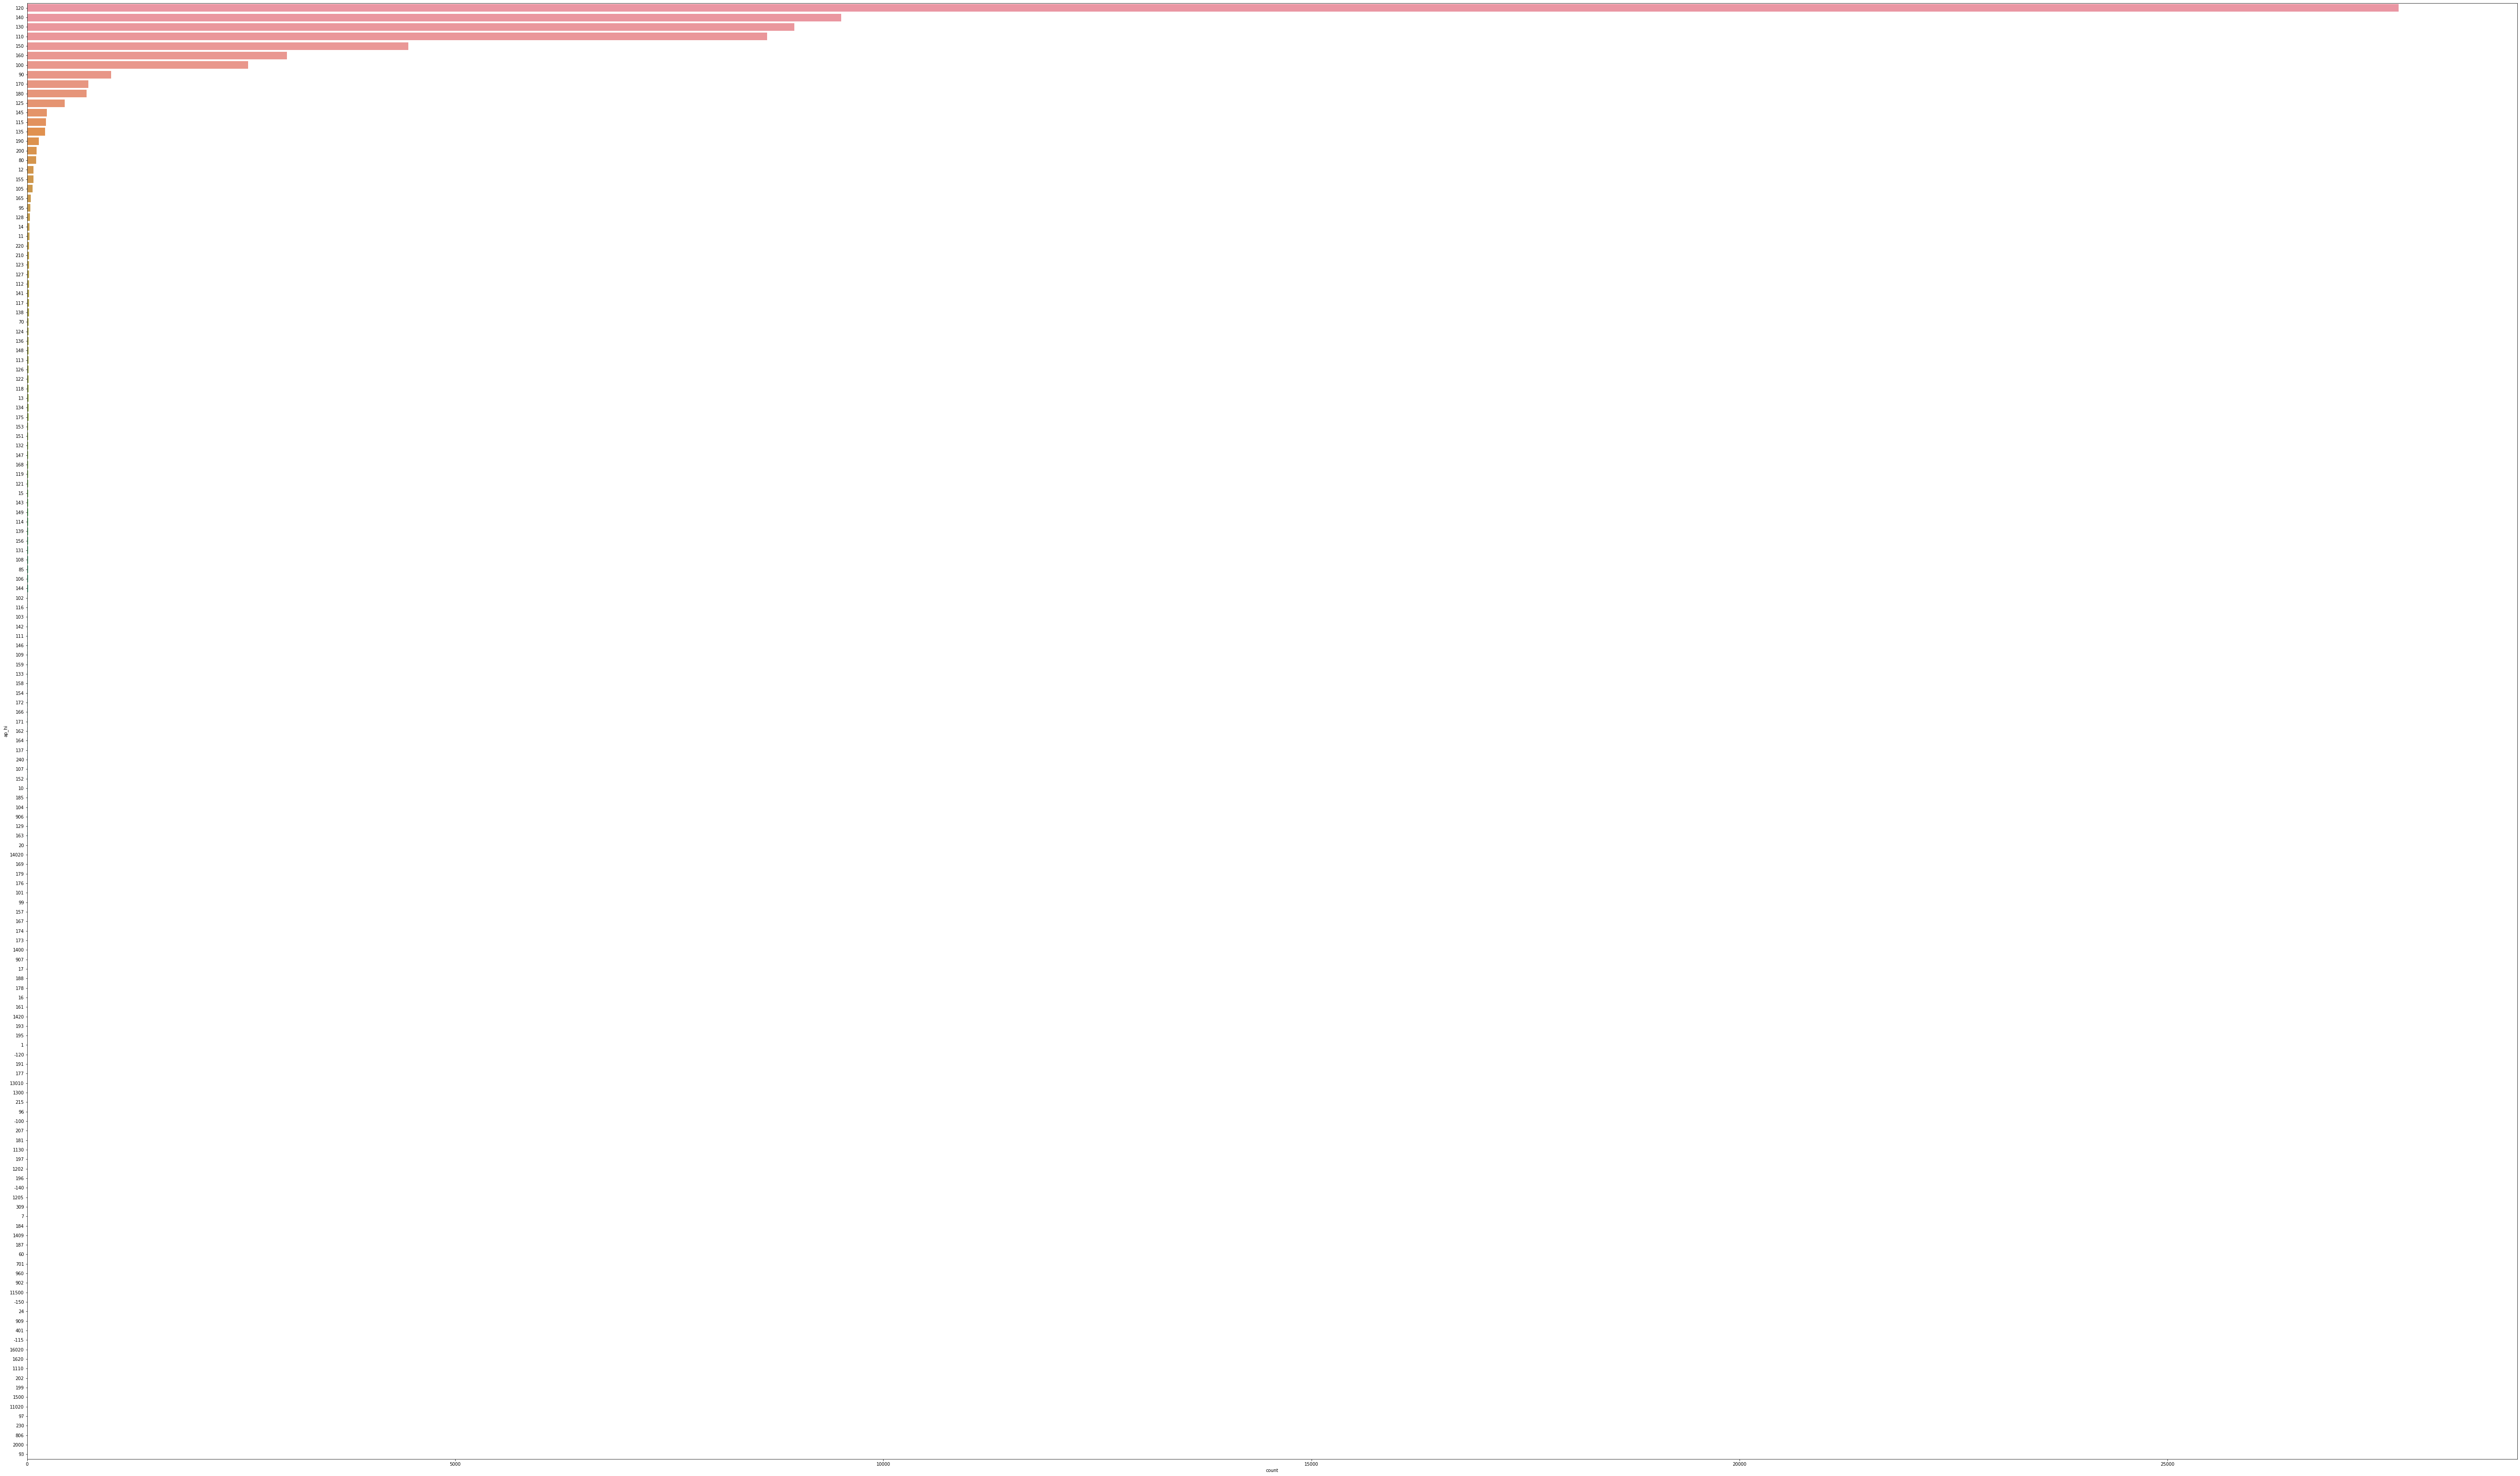

In [ ]:
plt.figure(figsize=(100, 60))
sns.countplot(data = df, y = 'ap_hi', order = df.ap_hi.value_counts().index)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


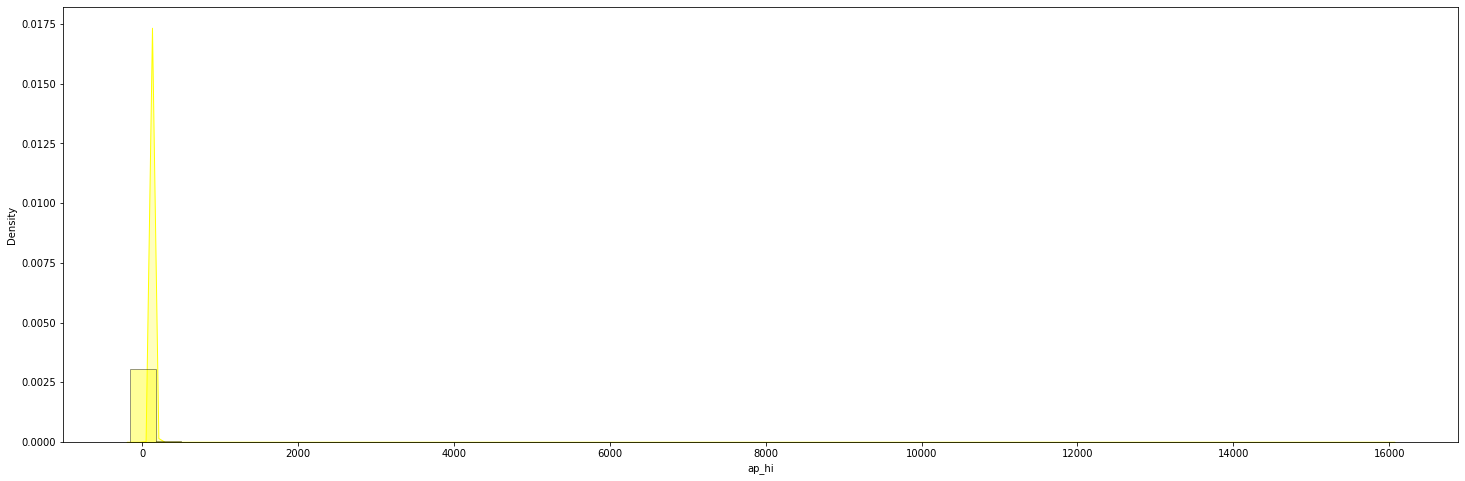

In [ ]:
plt.figure(figsize=(25, 8))
sns.distplot(df['ap_hi'], hist=True, kde=True, 
              color = 'yellow',bins = 50,
             kde_kws={'linewidth': 1,'shade': True },
             hist_kws={'edgecolor':'black'})

Pour la colone Tension artérielle diastolique :

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


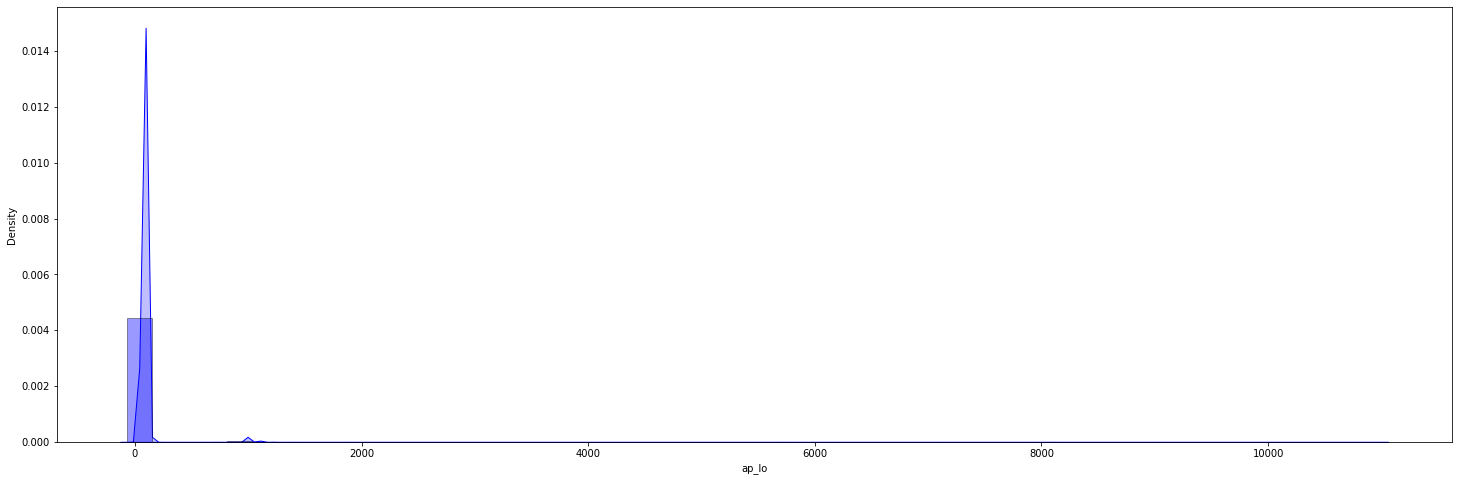

In [ ]:
plt.figure(figsize=(25, 8))
sns.distplot(df['ap_lo'], hist=True, kde=True, 
              color = 'blue',bins = 50,
             kde_kws={'linewidth': 1,'shade': True },
             hist_kws={'edgecolor':'black'})

Pour le cholesterol :

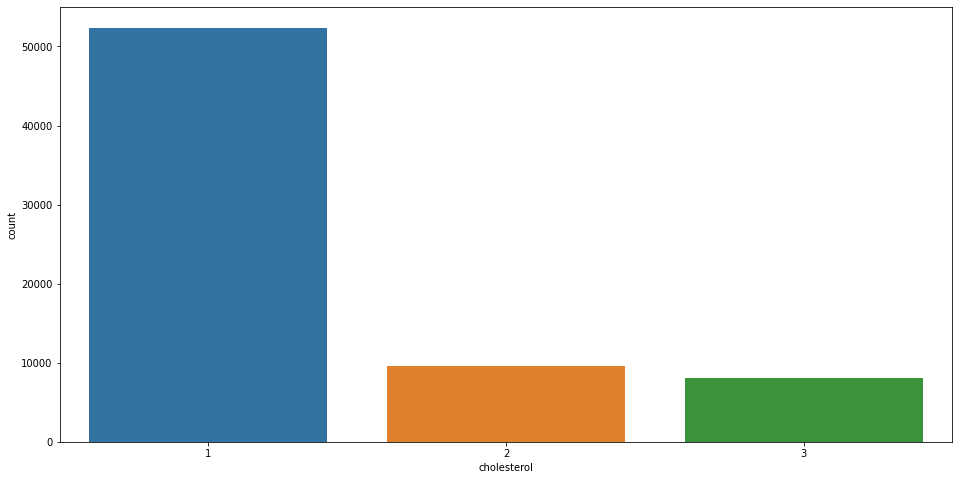

In [ ]:
plt.figure(figsize=(16, 8))
sns.countplot(data = df, x = 'cholesterol', order = df.cholesterol.value_counts().index)

pour la colone de glucose :

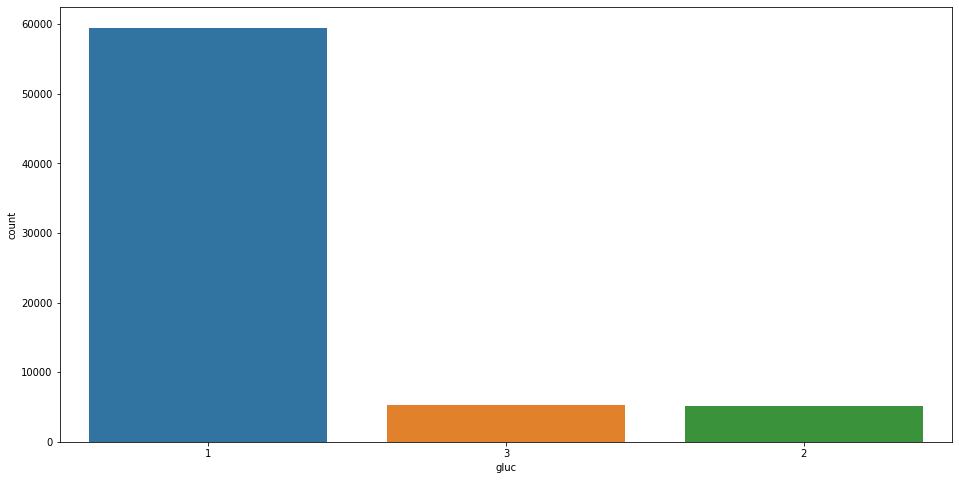

In [ ]:
plt.figure(figsize=(16, 8))
sns.countplot(data = df, x = 'gluc', order = df.gluc.value_counts().index)

avec 1 est normal , 2 est un peu loin de normal, et 3 est très loin de normal.

Pour la colone de smoke ( fumer ) :

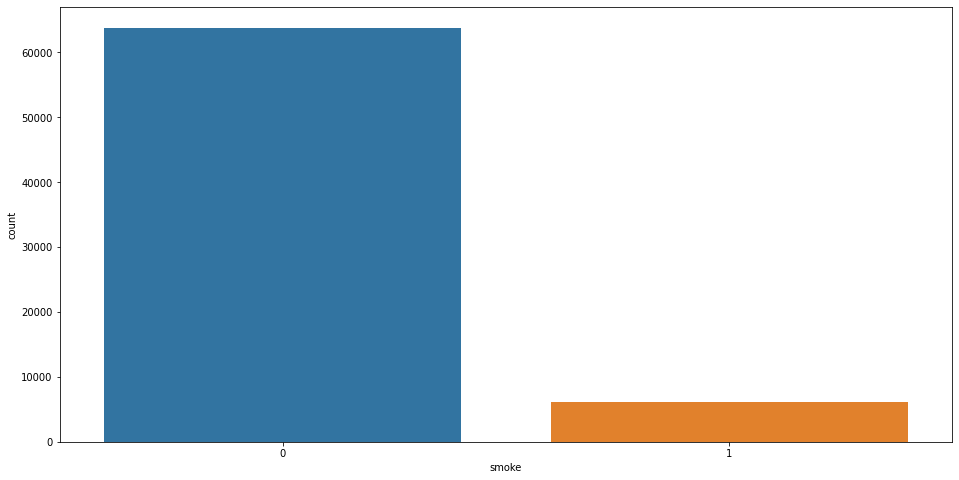

In [ ]:
plt.figure(figsize=(16, 8))
sns.countplot(data = df, x = 'smoke', order = df.smoke.value_counts().index)

Concernant l'alchool :

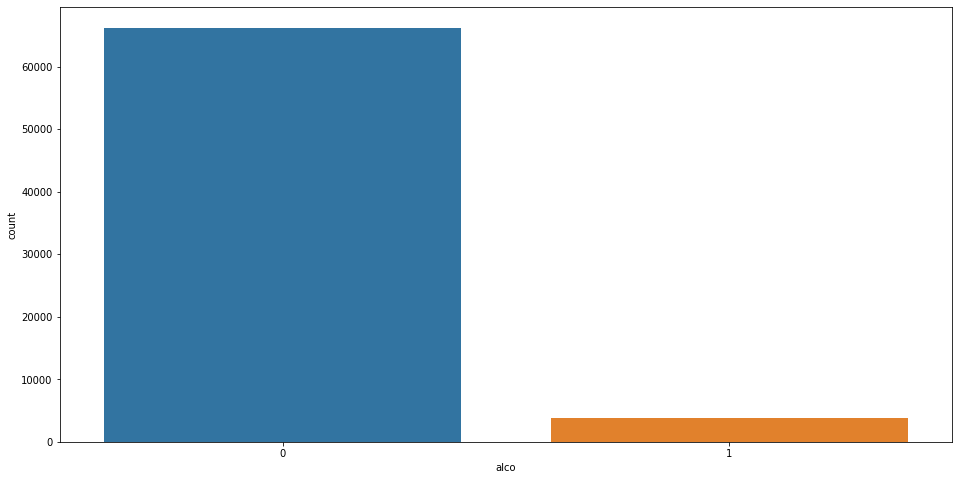

In [ ]:
plt.figure(figsize=(16, 8))
sns.countplot(data = df, x = 'alco', order = df.alco.value_counts().index)

les personnes qui sont actives dans cet échantillon :

In [ ]:
malades=0
for d in df["cardio"]:
  if d==1:
    malades=malades+1

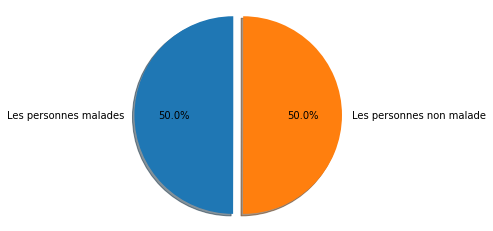

In [ ]:
labels = 'Les personnes malades', 'Les personnes non malade'
sizes = [malades,len(df)-malades]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Il sagit d'un échantillonage équilibré.